In [1]:
using DelimitedFiles

In [2]:
#TempAndPressure
A = readdlm("D:/julia-workspace/forbes.txt", ' ', Float64, '\n')

17×2 Array{Float64,2}:
 194.5  20.79
 194.3  20.79
 197.9  22.4
 198.4  22.67
 199.4  23.15
 199.9  23.35
 200.9  23.89
 201.1  23.99
 201.4  24.02
 201.3  24.01
 203.6  25.14
 204.6  26.57
 209.5  28.49
 208.6  27.76
 210.7  29.04
 211.9  29.88
 212.2  30.06

In [3]:
temp = A[:,1]

17-element Array{Float64,1}:
 194.5
 194.3
 197.9
 198.4
 199.4
 199.9
 200.9
 201.1
 201.4
 201.3
 203.6
 204.6
 209.5
 208.6
 210.7
 211.9
 212.2

In [4]:
pressure = A[:,2]

17-element Array{Float64,1}:
 20.79
 20.79
 22.4
 22.67
 23.15
 23.35
 23.89
 23.99
 24.02
 24.01
 25.14
 26.57
 28.49
 27.76
 29.04
 29.88
 30.06

In [5]:
using Plots

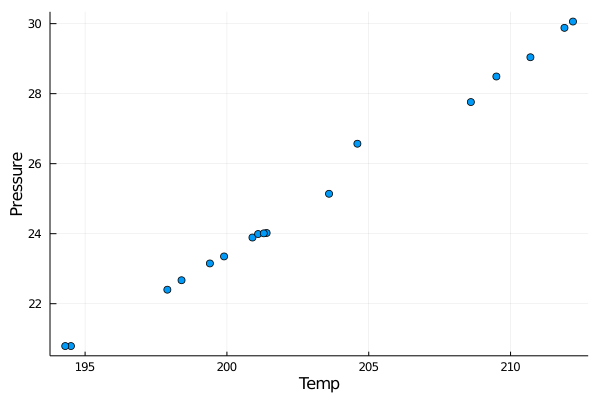

In [6]:
plot(temp, pressure, seriestype = :scatter, xlabel = "Temp" ,ylabel = "Pressure", labels = "")

In [7]:
#pressure = h(temp)
#pressure = theta_0 + theta_1 +temp
N = length(temp)

17

In [8]:
ones(N)

17-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [9]:
#design matrix
X = [ones(N) temp]

17×2 Array{Float64,2}:
 1.0  194.5
 1.0  194.3
 1.0  197.9
 1.0  198.4
 1.0  199.4
 1.0  199.9
 1.0  200.9
 1.0  201.1
 1.0  201.4
 1.0  201.3
 1.0  203.6
 1.0  204.6
 1.0  209.5
 1.0  208.6
 1.0  210.7
 1.0  211.9
 1.0  212.2

In [10]:
y = pressure

17-element Array{Float64,1}:
 20.79
 20.79
 22.4
 22.67
 23.15
 23.35
 23.89
 23.99
 24.02
 24.01
 25.14
 26.57
 28.49
 27.76
 29.04
 29.88
 30.06

In [11]:
#normal equation: (theta = (X*X')^(-1)*X'*y)
θ = (X'*X)^(-1)*X'*y

2-element Array{Float64,1}:
 -81.06372712863569
   0.522892400784523

In [12]:
print(size(X))
size(y)

(17, 2

(17,)

)

In [13]:
θ = inv(X'*X)*X'*y

2-element Array{Float64,1}:
 -81.06372712863569
   0.522892400784523

In [14]:
t =[1 207]
p = t *θ

1-element Array{Float64,1}:
 27.17499983376058

In [15]:
a = X[1,:]
b = X[N,:]
u = a' * θ # our prediction for a
v = b' * θ # our prediction for b

29.894040317840094

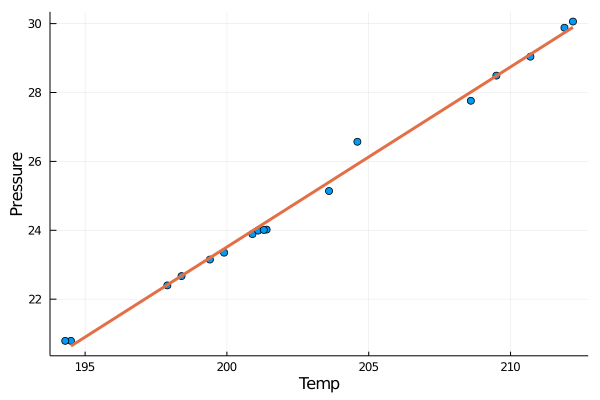

In [16]:
plot(temp, pressure, seriestype = :scatter, xlabel = "Temp" ,ylabel = "Pressure", labels = "")
plot!([a[2],b[2]], [u,v], labels = "", lw = 3)

In [41]:
sum((X*θ-y).*X,dims=2)

569×1 Array{Float64,2}:
   39.360539006539405
  425.4834045998422
 -248.6637445240794
  106.7526316983087
  360.2957737732476
  286.90079972691217
  362.43166590682165
  328.2092023896699
  168.8455644700391
  183.30376962498104
  512.9961945025052
  443.4369409207533
  171.86971685374127
    ⋮
    2.7242708723729665
 -245.5635233185226
 -158.69547319105206
 -365.10271712938214
  -38.154771887009595
   40.59433447281346
 -387.71504629330747
 -452.4894010292315
 -191.5112331735726
  333.9966967258194
 -770.4834040177742
   67.63058800496133

In [17]:
function train(X,y)
    θ = inv(X'*X)*X'*y
end

train (generic function with 1 method)

In [18]:
#BreastCancer
B = readdlm("wdbc.txt", ',', Float64, '\n')

569×32 Array{Float64,2}:
 842302.0        0.0  17.99   10.38  …  0.7119  0.2654   0.4601  0.1189
 842517.0        0.0  20.57   17.77     0.2416  0.186    0.275   0.08902
      8.43009e7  0.0  19.69   21.25     0.4504  0.243    0.3613  0.08758
      8.43483e7  0.0  11.42   20.38     0.6869  0.2575   0.6638  0.173
      8.43584e7  0.0  20.29   14.34     0.4     0.1625   0.2364  0.07678
 843786.0        0.0  12.45   15.7   …  0.5355  0.1741   0.3985  0.1244
 844359.0        0.0  18.25   19.98     0.3784  0.1932   0.3063  0.08368
      8.44582e7  0.0  13.71   20.83     0.2678  0.1556   0.3196  0.1151
 844981.0        0.0  13.0    21.82     0.539   0.206    0.4378  0.1072
      8.4501e7   0.0  12.46   24.04     1.105   0.221    0.4366  0.2075
 845636.0        0.0  16.02   23.24  …  0.1459  0.09975  0.2948  0.08452
      8.461e7    0.0  15.78   17.89     0.3965  0.181    0.3792  0.1048
 846226.0        0.0  19.17   24.8      0.3639  0.1767   0.3176  0.1023
      ⋮                            

In [19]:
y = B[:,2]
N = length(y)

569

In [20]:
X = [ones(N) B[:,3:12]]

569×11 Array{Float64,2}:
 1.0  17.99   10.38  122.8   1001.0  …  0.3001   0.1471   0.2419  0.07871
 1.0  20.57   17.77  132.9   1326.0     0.0869   0.07017  0.1812  0.05667
 1.0  19.69   21.25  130.0   1203.0     0.1974   0.1279   0.2069  0.05999
 1.0  11.42   20.38   77.58   386.1     0.2414   0.1052   0.2597  0.09744
 1.0  20.29   14.34  135.1   1297.0     0.198    0.1043   0.1809  0.05883
 1.0  12.45   15.7    82.57   477.1  …  0.1578   0.08089  0.2087  0.07613
 1.0  18.25   19.98  119.6   1040.0     0.1127   0.074    0.1794  0.05742
 1.0  13.71   20.83   90.2    577.9     0.09366  0.05985  0.2196  0.07451
 1.0  13.0    21.82   87.5    519.8     0.1859   0.09353  0.235   0.07389
 1.0  12.46   24.04   83.97   475.9     0.2273   0.08543  0.203   0.08243
 1.0  16.02   23.24  102.7    797.8  …  0.03299  0.03323  0.1528  0.05697
 1.0  15.78   17.89  103.6    781.0     0.09954  0.06606  0.1842  0.06082
 1.0  19.17   24.8   132.4   1123.0     0.2065   0.1118   0.2397  0.078
 ⋮             

In [21]:
θ = train(X,y)

11-element Array{Float64,1}:
  3.0520842486177546
 -0.4900122933399993
 -0.021973203109979293
  0.054974677835095034
  0.0009547714113002782
 -1.9408621097551044
 -0.09726080782528057
 -0.8097675232549887
 -6.431011461418055
 -1.0119000433107104
  0.11929241916460587

In [22]:
x100 = X[100, :]

11-element Array{Float64,1}:
   1.0
  14.42
  19.77
  94.48
 642.5
   0.09752
   0.1141
   0.09388
   0.05839
   0.1879
   0.0639

In [23]:
h100 = x100'*θ

0.5247336488058569

In [24]:
h200 = X[200, :]' * θ

0.462231662993756

In [25]:
function classify(xNew, θ, ϕ = 0.5)
    h = xNew'*θ
    if (h<ϕ) 0 else 1 end
end

classify (generic function with 2 methods)

In [26]:
classify(x100, θ)

1

In [27]:
classify(X[200,:], θ)

0

In [28]:
prediction = map(i->classify(X[i,:], θ), 1:N)

569-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 ⋮
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0
 0
 1

In [29]:
accuracy = sum(y .== prediction)/N

0.9384885764499121

In [30]:
prediction = map(i->classify(X[i,:], θ,0.45), 1:N)

569-element Array{Int64,1}:
 0
 0
 0
 0
 0
 1
 0
 1
 0
 0
 1
 1
 0
 ⋮
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0
 0
 1

In [31]:
accuracy = sum(y .== prediction)/N

0.929701230228471